In [1]:
install.packages('SuppDists')

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)


In [2]:
library(SuppDists)

In [3]:
pKendall(1/3, N=3, lower.tail = T)

[1] 0.8333333

In [29]:
x=seq(-1,1, length = 50)

In [30]:
p =pKendall(x, N=3, lower.tail = T)

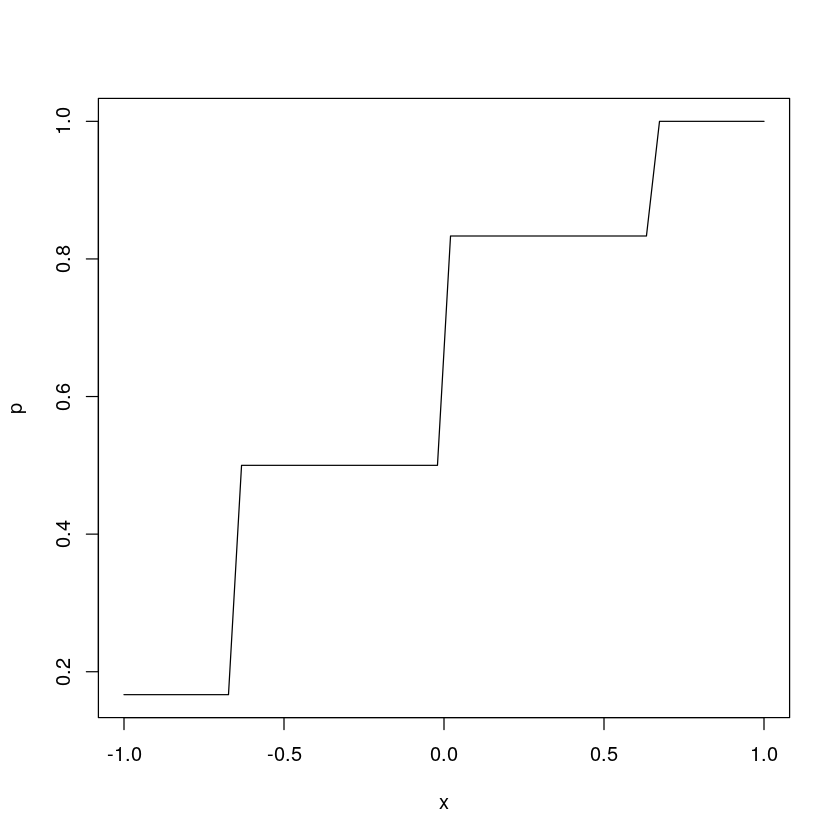

In [31]:
plot(x, p, type='l')

In [32]:
vec = which(diff(p)>0)

In [33]:
# x[ind]
# p[ind]

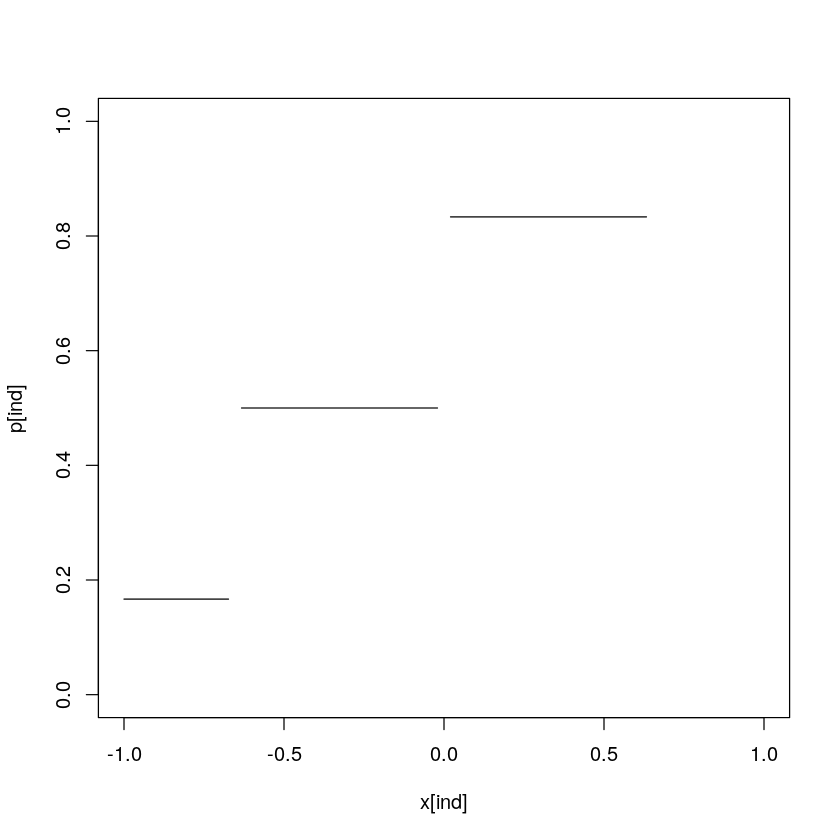

In [36]:
ind=1:vec[1]
plot(x[ind], p[ind], xlim = c(-1,1), ylim= c(0,1), type='l')
for(i in 2:length(vec)){
    ind = (vec[i-1]+1):vec[i]
    lines(x[ind], p[ind], type='l')
}

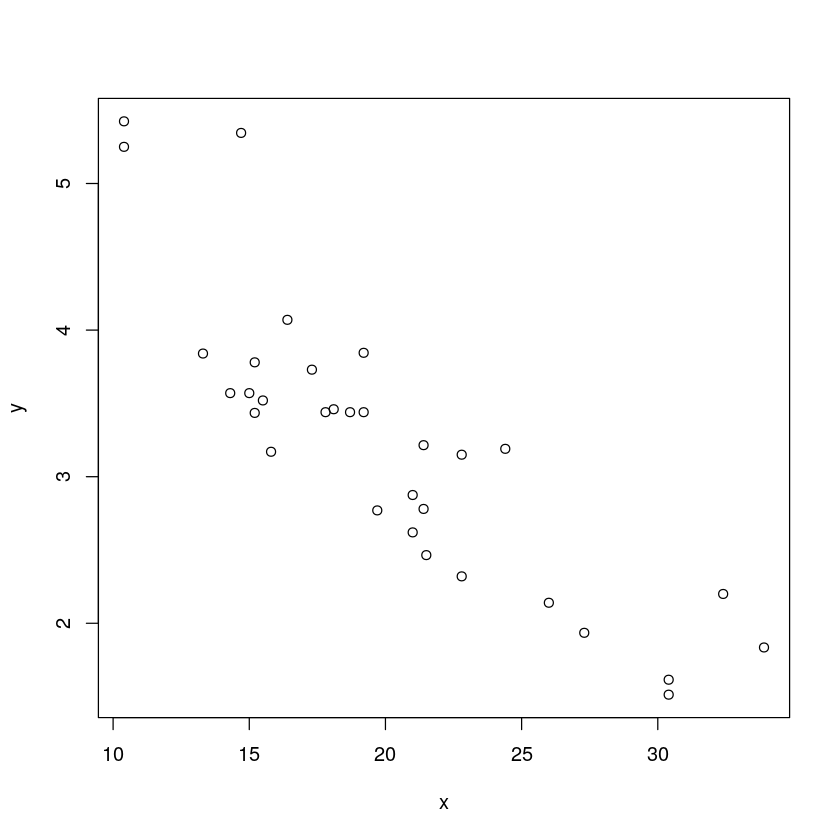

In [13]:
x = mtcars[,1]
y = mtcars[,6]
plot(x,y)

In [15]:
cor.test(x,y, method = 'pearson')
cor.test(x,y, method = 'kendall')


	Pearson's product-moment correlation

data:  x and y
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


Warning message in cor.test.default(x, y, method = "kendall"):
“Cannot compute exact p-value with ties”


	Kendall's rank correlation tau

data:  x and y
z = -5.7981, p-value = 6.706e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7278321 


In [38]:
res = matrix(NA, nrow=7, ncol=7)
for (i in (1:7)){
    for (j in i:7){
        M = cor.test(mtcars[,i], mtcars[,j],  method = 'kendall')
        res[i,j] = round(M$estimate,2)
        if (M$p.value < 0.05){
            res[i,j] = paste(toString(res[i,j]),'*')
        }
        if (M$p.value < 0.001){
            res[i,j] = paste(toString(res[i,j]),'*')
        }
        
    }
}
res

Warning message in cor.test.default(mtcars[, i], mtcars[, j], method = "kendall"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(mtcars[, i], mtcars[, j], method = "kendall"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(mtcars[, i], mtcars[, j], method = "kendall"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(mtcars[, i], mtcars[, j], method = "kendall"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(mtcars[, i], mtcars[, j], method = "kendall"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(mtcars[, i], mtcars[, j], method = "kendall"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(mtcars[, i], mtcars[, j], method = "kendall"):
“Cannot compute exact p-value with ties”Warning message in cor.test.default(mtcars[, i], mtcars[, j], method = "kendall"):
“Cannot compute exact p-value with ties”Warning message 

1 * *,-0.8 * *,-0.77 * *,-0.74 * *,0.46 * *,-0.73 * *,0.32 *
NA,1 * *,0.81 * *,0.79 * *,-0.55 * *,0.73 * *,-0.45 *
NA,NA,1 * *,0.67 * *,-0.5 * *,0.74 * *,-0.3 *
NA,NA,NA,1 * *,-0.38 *,0.61 * *,-0.47 * *
NA,NA,NA,NA,1 * *,-0.55 * *,0.03
NA,NA,NA,NA,NA,1 * *,-0.14
NA,NA,NA,NA,NA,NA,1 * *


In [39]:
x = mtcars[,1]
y = mtcars[,6]
cor.test(x,y, method = 'kendall', exact = NULL)
cor.test(x,y, method = 'kendall', exact = FALSE)

Warning message in cor.test.default(x, y, method = "kendall", exact = NULL):
“Cannot compute exact p-value with ties”


	Kendall's rank correlation tau

data:  x and y
z = -5.7981, p-value = 6.706e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7278321 



	Kendall's rank correlation tau

data:  x and y
z = -5.7981, p-value = 6.706e-09
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7278321 


In [43]:
M = cbind(x,y)
M = M[-which(duplicated(x)),]
M = M[-which(duplicated(M[,2])),]

In [42]:
which(duplicated(x))

[1]  2  9 16 23 25 28 32

In [44]:
cor.test(M[,1],M[,2], method = 'kendall', exact = NULL)
cor.test(M[,1],M[,2], method = 'kendall', exact = FALSE)


	Kendall's rank correlation tau

data:  M[, 1] and M[, 2]
T = 26, p-value = 1.059e-08
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7748918 



	Kendall's rank correlation tau

data:  M[, 1] and M[, 2]
z = -5.0474, p-value = 4.478e-07
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.7748918 


In [45]:
tau=cor.test(x,y,method = 'kendall')$estimate
tau
rho=cor.test(x,y,method = 'pearson')$estimate
rho
(2/pi)*asin(rho)

Warning message in cor.test.default(x, y, method = "kendall"):
“Cannot compute exact p-value with ties”

tau 
-0.7278321

cor 
-0.8676594

cor 
-0.668753

In [47]:
head(airquality)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [54]:
x = airquality[,1]
names=c( 'pearson', 'spearman', 'kendall')
for (j in 2:4){
    y = airquality[,j]
    c1 = cor.test(x,y, method = 'pearson')
    c2 = cor.test(x,y, method = 'spearman')
    c3 = cor.test(x,y, method = 'kendall')
    vec = c(c1$p.value, c2$p.value, c3$p.value )
    vec2 = c(c1$estimate, c2$estimate, c3$estimate )
    ind = which(vec ==max(vec))
    print(c(names[ind], round(vec2[ind],2), vec[ind]) ) 
    
}

Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”

                                          tau                        
             "kendall"                 "0.24" "0.000207620570762072" 


Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”

                                          tau                        
             "kendall"                "-0.43" "3.30361963456423e-11" 


Warning message in cor.test.default(x, y, method = "spearman"):
“Cannot compute exact p-value with ties”

                                          cor                        
             "pearson"                  "0.7" "2.93189659247788e-18" 
